# [Case Study Project](https://cloud-school.thinkific.com/courses/take/analytics-with-python-module/downloads/49216404-case-study)
## TITANIC DATASET
## Group 3
## Week 7
### Gabriel Osasumwen Okundaye, gabriel.okundaye@azubiafrica.org 🌍

## Table of Contents


[**Step 1: Business Understanding**](#Step-1:-Business-Understanding)

[**Step 2: Data Understanding**](#Step-2:-Data-Understanding)

- [**Load Data**](#Load-Data)
- [**Check Data Quality**](#Check-Data-Quality)
- [**Exploratory Data Analysis-EDA**](#Exploratory-Data-Analysis---EDA)
 

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding
This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives.
#### Titanic Story
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class passengers.

#### Objective
In this challenge, we will complete the analysis of what sorts of people were likely to survive. 

In addition, we will build a regression model to predict ticket price(Fare).



[Back to Top](#Table-of-Contents)

## Step 2: Data Understanding
The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information. This step is often mixed with the next step, Data Preparation.

### Data Dictionary
The data is in a csv file titanic.csv. 

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | male/female |	
| Age | Age | in years |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

**Variable Notes**
- pclass: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
 - Parent = mother, father
 - Child = daughter, son, stepdaughter, stepson
 - Some children travelled only with a nanny, therefore parch=0 for them.



### Load Data

This dataset is in titanic.csv. Make sure the file is in current folder. Please download the file from [here](https://github.com/data-lessons/python-business/tree/gh-pages/data) if you haven't done so yet.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


### Check Data Quality
Check data quality. Most common check is to check missing values. We can do some basic data cleaning like cleaning up currency field.
- Check null values
- Currency field need to be converted to float, remove '$' or ',', sometimes negative value is enclosed in ()


##### Task1: Check out Basic Dataframe Info

Hint: info() function.

Discuss missing values in the dataframe.

In [3]:
df_titanic.shape

(891, 12)

In [4]:
# Check null values
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


#### Discussion
The dataset has 891 entries (rows) and 12 columns. Of the 12 columns, only Age, Cabin, and Embarked have missing values, although it was observed that Fare column is not in a valid datatype for our analysis.
1. **Age:**
   - There are 714 non-null entries, indicating that there are missing values (891 - 714 = 177) in the "Age" column.
   - Considering replacing the missing values with the mean or median which ever is a better representation of central tendency.

2. **Cabin:**
   - There are only 204 non-null entries, indicating that a large number of values are missing in the "Cabin" column (891 - 204 = 687).
   - It is likely that not all passengers had assigned cabins.
   - Considering dropping the Cabin column as it is not relevant for this analytic process.

3. **Embarked:**
   - There are 889 non-null entries, indicating that there are two missing values in the "Embarked" column (891 - 889 = 2).
   - Considering replacing the missing values with the median.

4. **Fare:**
   - The "Fare" column has 891 non-null entries, but its Dtype is listed as "object" instead of the numerical type float64. 
   - Currency field need to be converted to float, remove '$' or ',', considering sometimes negative value is enclosed in ()


In [6]:
# Filling the missing age values with median
median = df_titanic['Age'].median()
df_titanic['Age'].fillna(median, inplace=True)

In [7]:
# Drop the cabin column
df_titanic.drop('Cabin', axis=1, inplace=True)

In [8]:
# Filling missing values in Embarked column with mode of the categories.
mode = df_titanic['Embarked'].mode()[0]
df_titanic['Embarked'].fillna(mode, inplace=True)


In [9]:
# Recheck for missing values
df_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##### Task2: Clean up Fare, Convert to Float
Strip "$" from Fare, convert datatype to float.

In [10]:
from typing import Type
from pandas import DataFrame

def stripper(df: DataFrame, column: str, strip: str) -> None:
    """
    The function takes in a dataframe, a column and a strip string. 
    It strips the strip string from the dataframe column by replacing it with an empty string 
    It also handles negative values in () format

    Parameters: df, column, strip
    """
    if  df[column].dtype == 'O':
        df[column] = (
                        df[column]
                        .str.replace('(', '-')
                        .str.replace(')',  '')
                        .str.replace(strip,'')
                     )
        
def datatyper(df: DataFrame, column: str, data_type: Type) -> None:
    """
    The function takes in a dataframe, a column and a data_type. 
    It assigns the datatype to the dataframe column

    Parameters: df, column, type
    """
    df[column] = df[column].astype(data_type)
    

# Strip '$' from Fare and account for negative values enclosed in ()
stripper(df_titanic, 'Fare', '$')

# Convert datatype to float
datatyper(df_titanic, 'Fare', 'float64')


df_titanic['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

##### Task3: Check out statistics of Numeric Columns

Hint:describe() function.

Discuss:
- Age, SibSp, Parch, Fare statistics
- What does mean Survived mean?

In [11]:
# Create a list of the numeric columns
numerics = [column for column in df_titanic.columns if df_titanic[column].dtype != "O"]
numerics


['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

**In this numerics list, PassengerId should be index. Pclass should be categorical**

In [12]:
# Set Index as PassengerId
df_titanic = df_titanic.set_index('PassengerId') if 'PassengerId' in df_titanic.columns else df_titanic

# Set Pclass column as categorical
datatyper(df_titanic, 'Pclass', 'category')

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Embarked  891 non-null    object  
dtypes: category(1), float64(2), int64(3), object(4)
memory usage: 70.6+ KB


In [13]:
df_titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### Discussion

Certainly! Let's discuss the statistics for the columns 'Age', 'SibSp', 'Parch', and 'Fare' in the context of the provided information. Additionally, I'll provide some insights on what "Survived" means:

1. **Age:**
   - A cound of 714 non-null entries, indicating that there are missing values..
   - The ages of passengers vary widely, with a mean age is approximately 29.70 years and range 0.42 to 80.00 years. Although the mean(29.7) and the median(28.0) are close.

2. **SibSp (Number of Siblings/Spouses aboard):**
   - The majority of passengers have either no siblings or spouses aboard (Q2 and Q3 at 0 and 1, respectively). The maximum value of 8 indicates some passengers had a relatively large number of siblings or spouses.

3. **Parch (Number of Parents/Children aboard):**
   - Most passengers did not have parents or children aboard (Q1, Q2, and Q3 at 0). However, some passengers had a larger number, with the maximum value being 6.

4. **Fare:**
   - The fares vary significantly, with a mean of approximately $32.20. The standard deviation is relatively high, indicating a wide range of fare values. The minimum fare is 0.00, which might represent missing or free tickets, and the maximum is 512.33.

5. **Survived:** This is a binary column where 1 implies passenger survived and 0 implies passenger did not.
    - **Mean:** The mean is approximately 0.38, suggesting that around 38% of the passengers in the dataset survived.
    - **Standard Deviation:** The standard deviation is approximately 0.49, indicating some variability in survival outcomes.
    - **Minimum:** The minimum value is 0, which means that some passengers did not survive.
    - **25th Percentile & Median (50th Percentile):** Is 0, reinforcing the observation that a significant portion of passengers did not survive.
    - **Maximum:** The maximum value is 1, meaning that some passengers did survive.


### Exploratory Data Analysis - EDA
EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

#### Types Of Features
##### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Sex,Embarked.

##### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: Fare

### Categorical Features
We will analysis Survived as univariant. Relationship between Sex and Survival, Embarked and Survival.

#### How many survived
Bar chart on Survived column. There are multiple ways to do the bar chart. We will demonstrate 2 ways here, seaborn countplot and pandas series bar.

##### Task4: Plot bar chart for Perished vs. Survived
Plot bar chart for Survived column. Survived=0 means perished, Survived=1 means Survived.

In [29]:
# from pandas import Series

# def plot_text(data: DataFrame | Series, groupby: Series = Series(), x_offset: int = 0) -> DataFrame | Series:
#     """
#     The function takes in a series or a dataframe data. If passing a dataframe, a groupby series is necesary.
#     It then plots data labels as plt.text.

#     Parameter: data, groupby, x_offset
#     """
#     if isinstance(data, DataFrame):
#         plot_data = groupby
#     else:
#         plot_data = data
        
#     for x,y in enumerate(plot_data):
#         label = f'{y:,.0f}'
#         p = y//2
#         plt.text(x+x_offset, p, label, ha='center')
#     return data

# def handle_plot_text(x, groupby, column, offset=-0.2, sort=False):
#     """
#     This function handles group plot text and returns data from plot_text

#     Parameter: 
#         x, groupby, column

#     Returns:
#         data        
#     """
#     for cat in x[column].astype('category').cat.categories:
#         data = plot_text(x, 
#                   x.groupby(groupby)[column].apply(lambda xx: (xx == cat).sum()).sort_index(ascending=sort),  
#                   offset
#                  )
#         offset = -offset
#     return data


In [15]:
def plot_labels(bar_plot: plt.Axes, fmt: str = '{:.0f}') -> plt.Axes:
    """
    The function takes in a bar plot.
    It then plots data labels for each container in the bar plot containers.
    And returns the bar_plot to allow chaining to other functions

    Parameter: bar_plot
    
    Return: bar_plot
    """
    for container in bar_plot.containers:
        bar_plot.bar_label(container, label_type='edge', fmt=fmt)
        
    return bar_plot

#### Using Series Bar

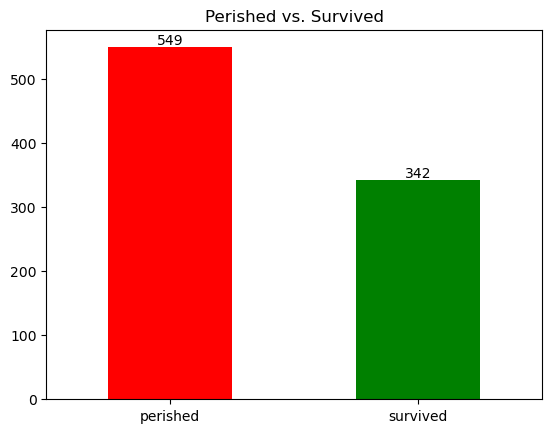

In [16]:
# Pandas Series Bar
# Create a figure and axes
fig, ax = plt.subplots()

# Bar Colors
bar_colors = ['red', 'green']

plot_survived = (
    df_titanic
    .groupby('Survived')['Survived']
    .count()    
    .rename({0: 'perished', 1: 'survived'})
    .rename_axis('Perished vs. Survived')
    .plot(kind='bar', rot=0, color=bar_colors, ax=ax)
)

# Adding a title to the plot
ax.set_title('Perished vs. Survived')

# Remove x-label
ax.set_xlabel('')

# Add labels to the bars
plot_labels(plot_survived)

# Display the plot
plt.show()

### Using seaborn

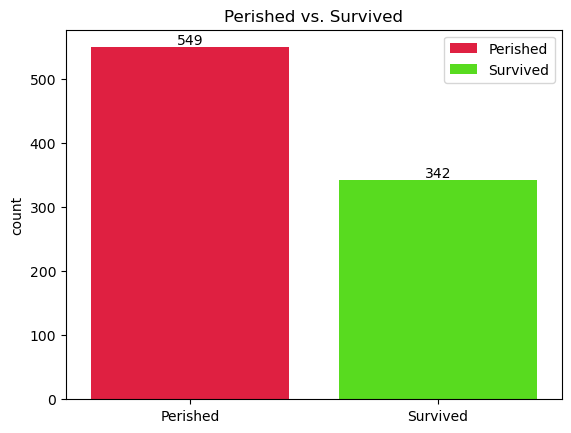

In [17]:
# Using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Survived labels
labels = ['Perished', 'Survived']

# Create a figure and axes
fig, ax = plt.subplots()

# Palette
palette = sns.color_palette(palette='prism_r')

# Creating the seaborn plot from the resultant series
seaborn_plot = sns.countplot(data=df_titanic, x='Survived', hue='Survived', palette=palette)

# Add labels to the bars
plot_labels(seaborn_plot)

# Rename and rotate x-axis labels
plt.xticks([0, 1], labels, rotation=0)

# Adding a title to the plot
ax.set_title('Perished vs. Survived')

# Remove x-label
ax.set_xlabel('')

# Add legend
plt.legend(labels)

# Display the plot
plt.show()

### Using plotly


In [55]:
# Using plotly
import plotly.express as px

# Create the figure
fig = (
    df_titanic
    .groupby('Survived')['Survived']
    .count()
    .rename({0: 'Perished', 1: 'Survived'})
    .rename_axis('Survival status')
    .reset_index(name='Count')
    .pipe(px.bar, x='Survival status', y='Count', color='Survival status', color_discrete_sequence=["red", "green"])
    .update_layout(
        title='Perished vs. Survived',
        xaxis_title='',
        width=600
    )
)

# Display the figure
fig.show()

**There are 549 passengers that perished while 342 passengers survived.**

#### Relationship between Sex and Survival
We may use aggregation function or plot.

Next 2 cells demonstate aggregate function.

The following cell demonstrates bar plot and countplot.


##### Task5: Plot Bar Chart on Number of Male and Female Passengers

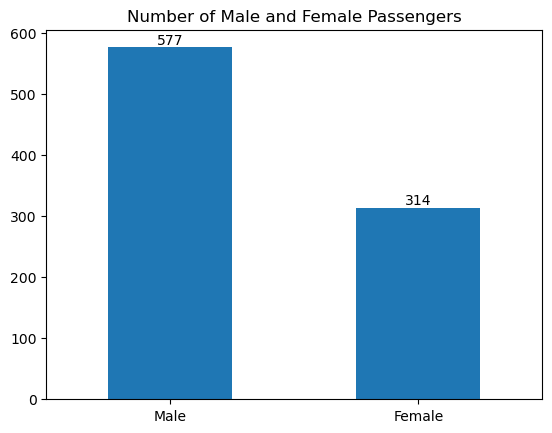

In [18]:
# Bar chart on number of male and female passengers -  Series plot

# Gender labels
labels = ['Male', 'Female']

# Create a figure and axes
fig, ax = plt.subplots()

gender_passengers = (
    df_titanic
    .groupby('Sex')['Sex']
    .count()
    .sort_index(ascending=False)
    # .pipe(plot_text)
    .plot(kind='bar', ax=ax)
)

# Rename and rotate x-axis labels
plt.xticks([0, 1], labels, rotation=0)

# Adding a title to the plot
ax.set_title('Number of Male and Female Passengers')

# Remove x-label
ax.set_xlabel('')

# Add labels to the bars
plot_labels(gender_passengers)

# Display the plot
plt.show()

**There were 577 male and 314 female passengers**

##### Task6: Groupby Sex to Find Survival Rate of Male and Female

In [19]:
# Finding survival rate of male and female
survival_rate = (
    df_titanic
    .groupby('Sex')['Survived']
    .mean()
    .pipe(lambda x: x * 100)
    .rename('Survival_rate')
)
survival_rate

Sex
female    74.203822
male      18.890815
Name: Survival_rate, dtype: float64

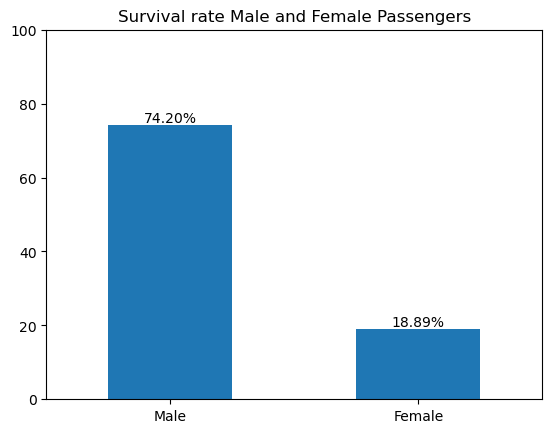

In [20]:
# Create a figure and axes
fig, ax = plt.subplots()

# Survival rate plot sr_plot
sr_plot = survival_rate.plot(kind='bar')

# Add labels to the bar plot
plot_labels(sr_plot, fmt='{:.2f}%')

# Gender labels
labels = ['Male', 'Female']

# Rename and rotate x-axis labels
plt.xticks([0, 1], labels, rotation=0)

# Adding a title to the plot
ax.set_title('Survival rate Male and Female Passengers')

# Set y-axis limits to stop at 100
plt.ylim(0, 100)

# Remove x-label
ax.set_xlabel('')

# Display the plot
plt.show()

**Survival rate is higher in females(74.20%) than males(18.89%)**

##### Task7: Plot Perished vs. Survived Bar for Male and Female
We will use seaborn countplot() again, but set argument `hue` to 'Survived'.

In [21]:
# (
#     df_titanic
#     # .pipe(lambda x: handle_plot_text(x, 'Sex', 'Survived'))
#     [['Sex', 'Survived']]
#     .set_index('Survived')
#     .rename({0: 'perished', 1: 'survived'})
#     .rename_axis('Survival outcome')
#     .reset_index()
#     .set_index('Sex')
#     .sort_index(ascending=False)
#     .pipe(
#         lambda x: sns.countplot(data=x, x='Sex', hue='Survival outcome')
#     )
#     .set(
#         title='Perished vs. Survived for Male and Female',
#         xlabel=''
#     )
# )

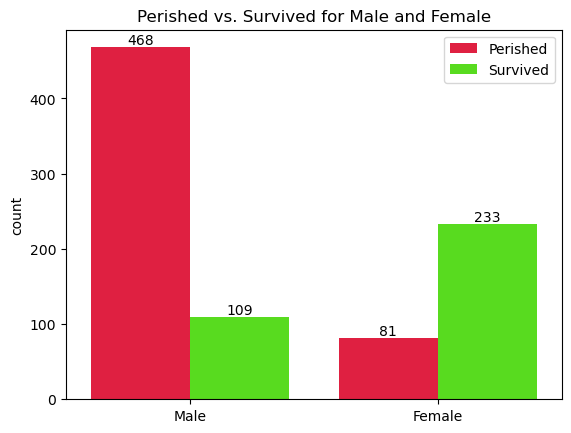

In [22]:
# Using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Survived labels
labels = ['Male', 'Female']

# Legend
legend = ['Perished', 'Survived']

# Create a figure and axes
fig, ax = plt.subplots()

# Palette
palette = sns.color_palette(palette='prism_r')

# Creating the seaborn count plot
seaborn_plot = sns.countplot(data=df_titanic, x='Sex', hue='Survived', palette=palette)

# Add labels to the bars
plot_labels(seaborn_plot)

# Rename and rotate x-axis labels
plt.xticks([0, 1], labels, rotation=0)

# Adding a title to the plot
ax.set_title('Perished vs. Survived for Male and Female')

# Remove x-label
ax.set_xlabel('')

# Add legend
plt.legend(legend)

# Display the plot
plt.show()


**The number of men (577) on the ship is lot more than the number of women (314). Still the number of survived women (233) is over twice the number of survived males (109). Majority women survived while vast majority of men perished.**

#### Pclass and Survival
##### Task 8: List survival rate of each Pclass 

In [23]:
# Finding survival rate of each Pclass
sr_pclass = (
    df_titanic
    .groupby('Pclass')['Survived']
    .mean()
    .pipe(lambda x: x * 100)
    .rename('Survival_rate')
)
sr_pclass

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survival_rate, dtype: float64

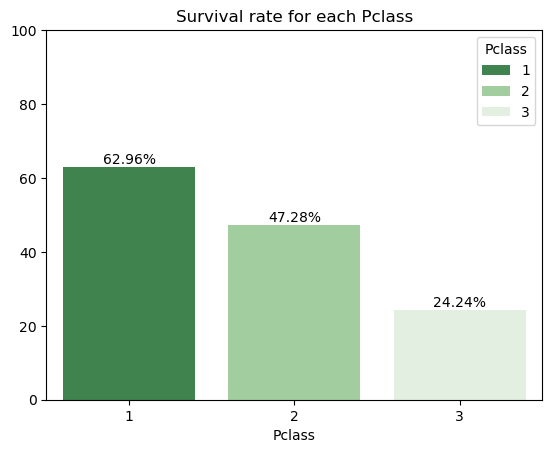

In [24]:
# Using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots()

palette=sns.color_palette('PRGn_r')

# Survival rate plot sr_plot
sr_plot = sns.barplot(x=sr_pclass.index, y=sr_pclass.values, hue=sr_pclass.index, palette=palette)

# Add labels to the bar plot
plot_labels(sr_plot, fmt='{:.2f}%')

# Rotate x-axis labels
plt.xticks(rotation=0)

# Adding a title to the plot
ax.set_title('Survival rate for each Pclass')

# Set y-axis limits to stop at 100
plt.ylim(0, 100)

# Display the plot
plt.show()

**The survival rate for Pclass 1, 2, and 3 are 62.96%, 47.28%, and 24.24% respectively.**

##### Task 9: Plot Perished vs. Survived for each Pclass

In [ ]:
# # Creating the seaborn count plot through chaining
# (
#     df_titanic
#     .pipe(lambda x: handle_plot_text(x, 'Pclass', 'Survived', sort=True))
#     [['Pclass', 'Survived']]
#     .set_index('Survived')
#     .rename({0: 'perished', 1: 'survived'})
#     .rename_axis('Survival outcome')
#     .reset_index()
#     .set_index('Pclass')
#     .sort_index(ascending=False)
#     .pipe(
#         lambda x: sns.countplot(data=x, x='Pclass', hue='Survival outcome')
#     )
#     .set(
#         title='Perished vs. Survived for each Pclass',
#         xlabel='Pclass'
#     )
# )

# # Display the plot
# plt.show()

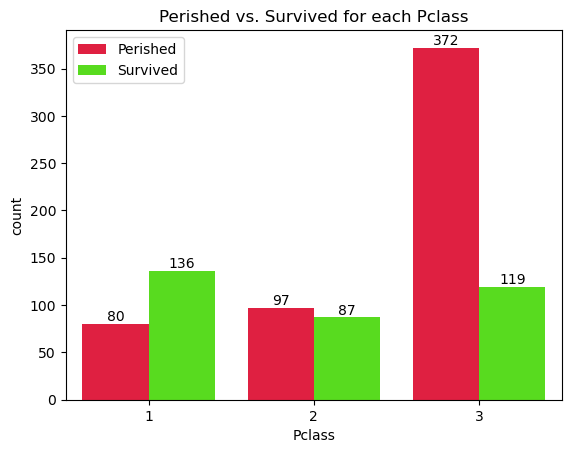

In [25]:
# Using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Legend
legend = ['Perished', 'Survived']

# Create a figure and axes
fig, ax = plt.subplots()

# Palette
palette = sns.color_palette(palette='prism_r')

# Creating the seaborn count plot
seaborn_plot = sns.countplot(data=df_titanic, x='Pclass', hue='Survived', palette=palette)

# Add labels to the bars
plot_labels(seaborn_plot)

# Adding a title to the plot
ax.set_title('Perished vs. Survived for each Pclass')

# Add legend
plt.legend(legend)

# Display the plot
plt.show()

**In the upper class(Pclass 1), majority of the passengers survived(136 > 80) while in the middle class(Pclass 2) the survival outcome was close(survived=97, perished=87). For the lower class(Pclass 3), the number of passengers who perished(372) was over 3 times those who survived(119).**

### Continuous Features


#### Univariate Distribution Plot
There are multiple ways to do histogram. I will demonstrate 3 ways.
- ax.hist(): can not handle NaN value
- seaborn.distplot(): can not handle NaN. Has KDE(kernel density estimation) by default.
- pd.Series.hist(): simplest and can handle NaN by default

##### Task 10: Plot histogram for Age
Use pandas Series hist() function which handles missing value.

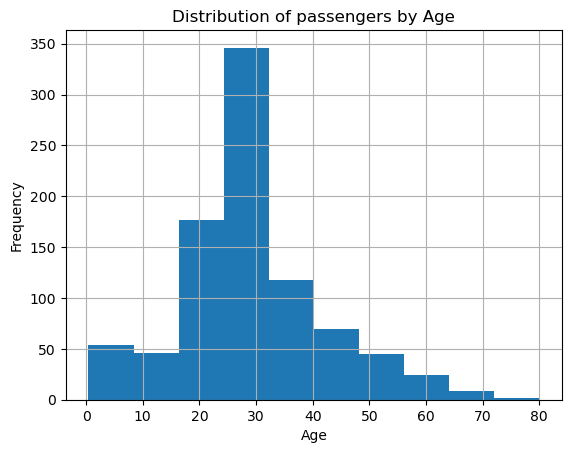

In [26]:
# Pandas Series hist() plot
(
    df_titanic
    ['Age']
    .hist()
    .set(
        title='Distribution of passengers by Age',
        xlabel='Age',
        ylabel='Frequency'
    )
)
    
# Display the plot
plt.show()


**Right Skewed indicating most of the passengers that boarded were young and/or less than 40 years even though the ages of the overall passengers was between 0-80 years.**

##### Task11: Stack age histogram of survived on top of overall age histogram
Plot histogram for Age, then filter out survived passenger and plot histogram for Age on same axis. Set different color and label.

In [27]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Embarked  891 non-null    object  
dtypes: category(1), float64(2), int64(3), object(4)
memory usage: 70.6+ KB


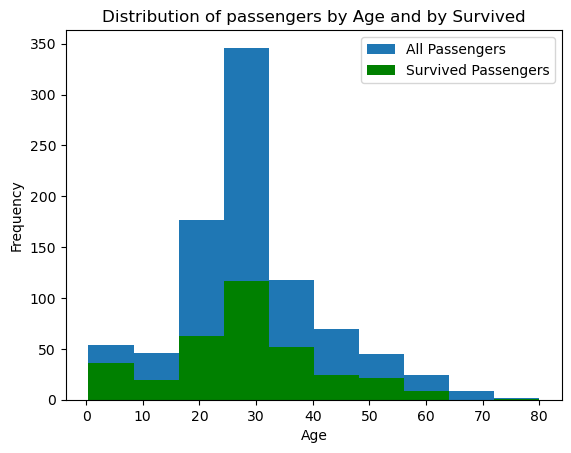

,count,mean,std,min,25%,50%,75%,max
Age,891.0,29.361582,13.019697,0.42,22.0,28.0,35.0,80.0
Survived,891.0,0.383838,0.486592,0.00,0.0,0.0,1.0,1.0


In [31]:
import matplotlib.pyplot as plt

# Stack age histogram of survived on top of overall age histogram
columns = ['Age', 'Survived']

def plotter(df, kind='hist', columns=None):
    # Plot for the overall age
    (
        df[columns[0]]
        .plot(kind=kind, label='All Passengers')
    )
    
    # Filter out survived passengers
    survived_age = df[df[columns[1]]==1][columns[0]]
    
    # Plot for survived passengers on the same axis
    (
        survived_age
        .plot(kind=kind, color='g', label='Survived Passengers')
        .set(
            title='Distribution of passengers by Age and by Survived',
            xlabel='Age',
            ylabel='Frequency'
        )
    )
    
    # Show legend
    plt.legend()


    # Display the plot
    plt.show()
    
    return df
    

(
    df_titanic
    [columns]
    .pipe(lambda x: plotter(x, columns=columns))
    .describe().T    
)

**Children have higher survival rate. Senile adults(>65years) seldom survived.**

[Back to Top](#Table-of-Contents)


# Thank you